<h1 style="text-align:center"> NYC Open Data Week at TIQC </h1>
<h2 style="text-align:center"> Data Visualization in Python</h2>

<img src="https://cdn.pixabay.com/photo/2016/08/02/18/27/statistic-1564428_1280.png" width="300" align="center" >

Data visualization is the graphical representation of data through graphs, charts, maps, etc. It allows data to tell its own story without imposing any assumptions or models. In other words, data visualization allows the data to speak for itself!

Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations can be detected.<br>

Python offers multiple great graphing libraries that come packed with lots of different features. No matter if you want to create interactive, live or highly customized plots python has an excellent library for you.<br>

To get a little overview here are a few popular plotting and essential libraries:<br>

 - <b>Pandas:</b> used for data analysis, reading and manipulating data<br>
 - <b>Matplotlib: </b>low level, provides lots of freedom<br>
 - <b>Seaborn:</b> high-level interface, great default styles<br>
 - <b>ggplot:</b> based on R’s ggplot2, uses Grammar of Graphics<br>
 - <b>Plotly:</b> can create interactive plots<br>

Source: <a href =https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed>Introduction to Data Visualization in Python</a>, <a href = https://www.tableau.com/learn/articles/data-visualization> Data Visualization </a>


<br> 

This workshop will serve as an introduction to visualizations in Python using data from NYC OpenData. Specifically, we will utilize the fire incident dispatch dataset. We will be exploring trends of fire incident types throughout the five boroughs, as well as response-time trends that is measured in seconds. For the purposes of this workshop, the dataset used was filtered to include only responses for the year 2018 and include only fire-related incident types.

<br> For more information about the data, please refer to the link below. <br>
Data Source: <a href =https://data.cityofnewyork.us/Public-Safety/Fire-Incident-Dispatch-Data/8m42-w767>
Fire Incident Dispatch Data</a>


# Table of Contents

<div class = "alert alert-info">

1. [Importing Libraries  and Open NYC Data](#1)<br>
<br>    
2. [Single Variable Visualization](#2)<br>
    
    2.1 [Categorical Variables](#2.1)<br>
    2.1.1 [Bar Graphs](#2.1.1)<br>
    2.1.2 [Horizontal Bar Graphs](#2.1.2)<br>
    2.1.3 [Pie Charts](#2.1.3)<br>
    
    2.2 [Numerical Variables](#2.2)<br>
    2.2.1 [Histograms](#2.2.1)<br>
    2.2.2 [Density Plots](#2.2.2)<br>
<br>    
3. [Two or More Variables Visualization](#3) <br>
    
    3.1 [Categorical Variables](#3.1)<br>
    3.1.1 [Side by Side Graphs](#3.1.1)<br>
    
    3.2 [Numerical Variables](#3.2)<br>
    3.2.1 [Scatter Plot](#3.2.1)<br>
    3.2.2 [Time Series](#3.2.2)<br>
    
    3.3 [Categorical & Numerical Variables](#3.3)<br>
    3.3.1 [Faceting](#3.3.1)<br>
    3.3.2 [Stacking & Overlapping](#3.3.2)<br>
  

</div>
<hr>

## Importing Libraries and Open NYC Data<a id=1></a>
The first thing we do when creating visualizations is to import the necessary packages and read in the dataset we will be working with.

In [1]:
### Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading in data
Fire2018 = pd.read_csv('https://raw.githubusercontent.com/aparada96/nycopendata-dataVisuals/main/2018%20Fire%20Incident%20Data.csv') 


In [2]:
Fire2018.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,1800111510150000,01/01/2018 12:02:05 AM,QUEENS,1151,BAY 28 ST & SUNNYSIDE ST,QUEENS,11691,101,31.0,414.0,...,01/01/2018 12:03:41 AM,01/01/2018 12:07:55 AM,01/01/2018 12:15:08 AM,N,Y,350,280,1,1,0
1,1800197070150000,01/01/2018 12:02:54 AM,QUEENS,9707,75 AVE & 178 ST,QUEENS,11366,107,24.0,408.0,...,01/01/2018 12:03:58 AM,01/01/2018 12:07:15 AM,01/01/2018 12:10:32 AM,N,Y,261,204,1,1,0
2,1800137760240000,01/01/2018 12:03:53 AM,BROOKLYN,3776,CHURCH AVE & STORY ST,BROOKLYN,11218,66,39.0,312.0,...,01/01/2018 12:04:56 AM,01/01/2018 12:08:00 AM,01/01/2018 12:10:40 AM,N,Y,247,205,1,0,0
3,1800152100150000,01/01/2018 12:13:46 AM,QUEENS,5210,LINDEN BLVD & 121 ST,QUEENS,11420,106,28.0,410.0,...,01/01/2018 12:14:25 AM,01/01/2018 12:16:26 AM,01/01/2018 12:21:10 AM,N,Y,160,141,3,2,1
4,1800131730120010,01/01/2018 12:14:20 AM,BRONX,3173,CROTONA AVE & 182 ST,BRONX,10457,48,15.0,206.0,...,01/01/2018 12:14:59 AM,01/01/2018 12:17:14 AM,01/01/2018 12:26:54 AM,N,Y,174,160,3,2,1


In [3]:
### Cleaning data
# Since the data has a valid response indicator, we will filter for those responses only.

Fire2018 = Fire2018[(Fire2018.VALID_INCIDENT_RSPNS_TIME_INDC =='Y')] # Filter for Valid Responses Only


# Renaming columns of interest 
Fire2018= Fire2018.rename(columns={'ZIPCODE': 'Zip', 
                                   'INCIDENT_RESPONSE_SECONDS_QY': 'ResponseTime',
                                   'INCIDENT_CLASSIFICATION_GROUP': 'IncidentType', 
                                   'INCIDENT_BOROUGH': 'Borough',
                                   'INCIDENT_DATETIME': 'Date',
                                   'ALARM_BOX_LOCATION' : 'Neighborhood'})


# The "floor" method normalizes the DateTimes to a certain frequency.
# A frequency of days ("d") removes the Time component without
# converting the DateTime back to a String.
Fire2018['Date'] = pd.to_datetime(Fire2018.Date).dt.floor("d")


Fire2018.head() #check that our data was cleaned!

,STARFIRE_INCIDENT_ID,Date,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,Neighborhood,Borough,Zip,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,ResponseTime,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,1800111510150000,2018-01-01,QUEENS,1151,BAY 28 ST & SUNNYSIDE ST,QUEENS,11691,101,31.0,414.0,...,01/01/2018 12:03:41 AM,01/01/2018 12:07:55 AM,01/01/2018 12:15:08 AM,N,Y,350,280,1,1,0
1,1800197070150000,2018-01-01,QUEENS,9707,75 AVE & 178 ST,QUEENS,11366,107,24.0,408.0,...,01/01/2018 12:03:58 AM,01/01/2018 12:07:15 AM,01/01/2018 12:10:32 AM,N,Y,261,204,1,1,0
2,1800137760240000,2018-01-01,BROOKLYN,3776,CHURCH AVE & STORY ST,BROOKLYN,11218,66,39.0,312.0,...,01/01/2018 12:04:56 AM,01/01/2018 12:08:00 AM,01/01/2018 12:10:40 AM,N,Y,247,205,1,0,0
3,1800152100150000,2018-01-01,QUEENS,5210,LINDEN BLVD & 121 ST,QUEENS,11420,106,28.0,410.0,...,01/01/2018 12:14:25 AM,01/01/2018 12:16:26 AM,01/01/2018 12:21:10 AM,N,Y,160,141,3,2,1
4,1800131730120010,2018-01-01,BRONX,3173,CROTONA AVE & 182 ST,BRONX,10457,48,15.0,206.0,...,01/01/2018 12:14:59 AM,01/01/2018 12:17:14 AM,01/01/2018 12:26:54 AM,N,Y,174,160,3,2,1


## Single Variable Visualization <a id=2></a>

There are two types of variables we can visualize: **categorical** and **numerical** variables. 


**Categorical** variables are not numbers. They are variables such as sex (male/female), education level (HS/College/Graudate Degree), or country names ("Colombia","Brazil","Guyana","U.S","U.A.E"). This may be confusing sometimes because numbers can be encoded as categorical variables such as zipcode ("11360","11428","90210").

**Numerical** variables are numbers. They are variables such as population size, age, or number of teams.

### Categorical Variables <a id=2.1></a>

### Bar Graphs<a id=2.1.1></a>
Bar graphs are useful for visualizing single variables. We can use these to visualize the count of each category in a variable. 

There are different variations of bar graphs including: **horizontal bar graphs, lollipop and dot plots**.

Let's visualize the number of fires per borough from our dataset. First, we are going to create a new dataframe with just the borough variable from our Fire2018 dataframe. Once we pull out the variable of interest we will count the number of occurrences of each borough to get the number of fires per borough. 

In [4]:
# Creating new df with variables of interest
boroughs = Fire2018[['Borough']]
boroughs.head()

,Borough
0,QUEENS
1,QUEENS
2,BROOKLYN
3,QUEENS
4,BRONX


In [5]:
boroughs.shape

(37268, 1)

In [6]:
# Getting the count of each borough
Bcount = boroughs.groupby(["Borough"])["Borough"].agg('count').to_frame('Count').reset_index()
Bcount

,Borough,Count
0,BRONX,7645
1,BROOKLYN,11844
2,MANHATTAN,8244
3,QUEENS,7713
4,RICHMOND / STATEN ISLAND,1822


In [7]:
# Sorting the df by ascending value to ensure our visualization is sorted correctly
# When creating bar graphs it is important to make sure they are sorted

Bcount = Bcount.sort_values("Count", ascending = True)    
Bcount

,Borough,Count
4,RICHMOND / STATEN ISLAND,1822
0,BRONX,7645
3,QUEENS,7713
2,MANHATTAN,8244
1,BROOKLYN,11844


#### Creating the bar graph

[Text(0.5, 0, 'Borough Name'),
 Text(0, 0.5, '# of Fires'),
 Text(0.5, 1.0, '# of Fires per Borough')]

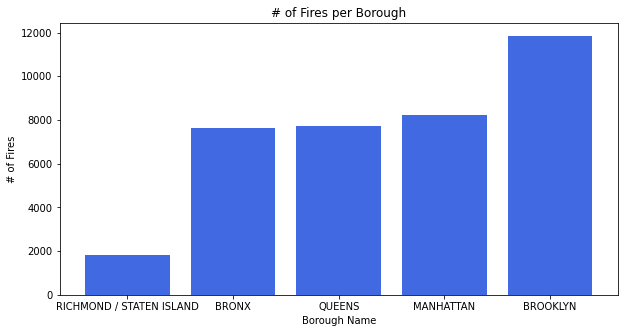

In [8]:
fig, ax = plt.subplots(figsize=(10,5))       

ax.bar(x = Bcount.Borough, 
       height = Bcount.Count,
       color = "royalblue")  

ax.set(xlabel = 'Borough Name',
       ylabel = '# of Fires',
       title = '# of Fires per Borough')

### Horizontal Bar Graph<a id=2.1.2></a>

A variation of a standard bar graph is the horizontal bar graph. This variation is often helpful when the category names are long so they do not overlap on the x-axis, rather it is given ample space on the y-axis so it is easier to read. 

When the bars are similar in length, it can also be beneficial to create a lollipop or dot plot. These plots make it easier to distinguish the slight differences in bar length and you may truncate the axis to make a better plot.

#### Creating the horizontal bar plot

<Figure size 1382.4x777.6 with 0 Axes>

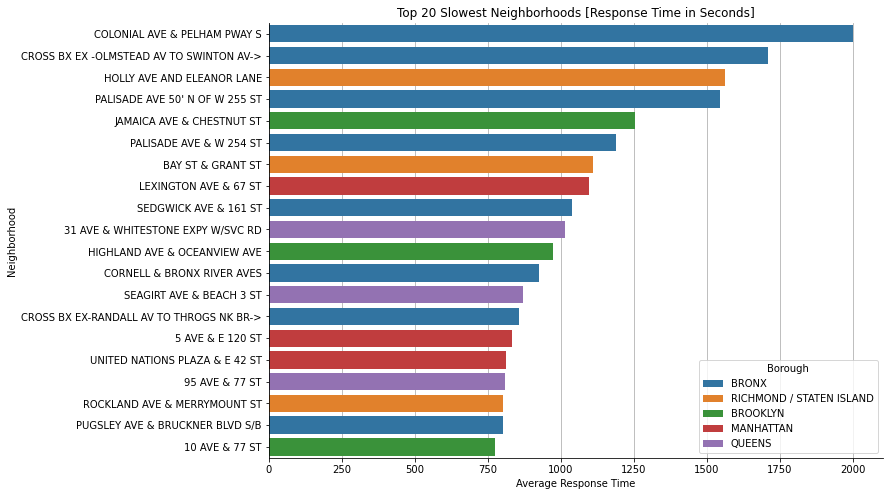

In [10]:
#first group by neighborhood & compute mean response time for each area
nhood = Fire2018.groupby(['Neighborhood','Borough'])['ResponseTime'].mean().reset_index()

#next filter for the top 20 neighborhoods
tophoods = nhood.nlargest(20,'ResponseTime')

#lastly sort by highest to lowest
tophoods = tophoods.sort_values(by = 'ResponseTime', ascending=False)
tophoods

# horizontal bar chart

#plt.figure(dpi=400)
fig = plt.figure(figsize=(19.20,10.80))
fig, ax = plt.subplots(figsize=(11, 8))        

#ax.barh(y = tophoods.areaName,  width = tophoods.Price)       #using matplotlib  

sns.barplot(y='Neighborhood', 
            x="ResponseTime", 
            hue="Borough", 
            data=tophoods,
            dodge=False)                                       #using seaborn

ax.spines['top'].set_visible(False)                            # remove top border
ax.spines['right'].set_visible(False)                          # remove right border

ax.set(xlabel = 'Average Response Time', ylabel='Neighborhood', 
      title = 'Top 20 Slowest Neighborhoods [Response Time in Seconds]') 

ax.grid(axis='x')                                              # show horizontal grid lines only
ax.set_axisbelow(True)                                         # show grid behind shape

### Pie Charts<a id=2.1.3></a>
Pie charts are useful for visualizing proportions. For example, visualizing what percent of fires occur in each borough.

A variation of the pie chart is the donut chart, which is very similar but can be more difficult to distinguish size differences.

When using pie charts, you need to be very careful about the percentages adding to 100%, sometimes the visualizations will not equal 100% because of the way python rounds numbers. 

#### Creating the pie chart

Text(0.5, 1.0, 'The Percent of Fires in each Borough')

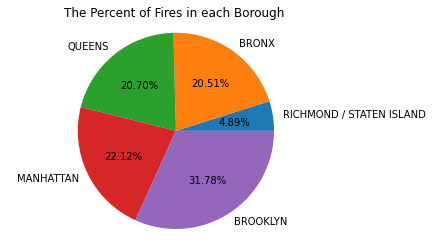

In [11]:
fig, ax = plt.subplots()        # initialize a figure 

ax.pie(x = Bcount.Count, labels = Bcount.Borough,
      autopct = '%1.2f%%')      # autopct shows the percentage of each slice 

ax.axis('equal')                # Equal aspect ratio ensures that pie is drawn as a circle.

ax.set_title('The Percent of Fires in each Borough')

### Numerical Variables <a id=2.2></a>

### Histograms<a id=2.2.1></a>

Histograms look very similar to bar graphs but they differ because histograms are only used for numerical data to demonstrate a frequency distribution, whereas bar graphs compare data.

For example, we will create a histogram that illustrates response time to fires in NYC.

#### Creating the histogram

In [9]:
Fire2018.ResponseTime.describe()

count    37268.000000
mean       272.487469
std         99.126009
min          5.000000
25%        213.000000
50%        261.000000
75%        317.000000
max       3135.000000
Name: ResponseTime, dtype: float64

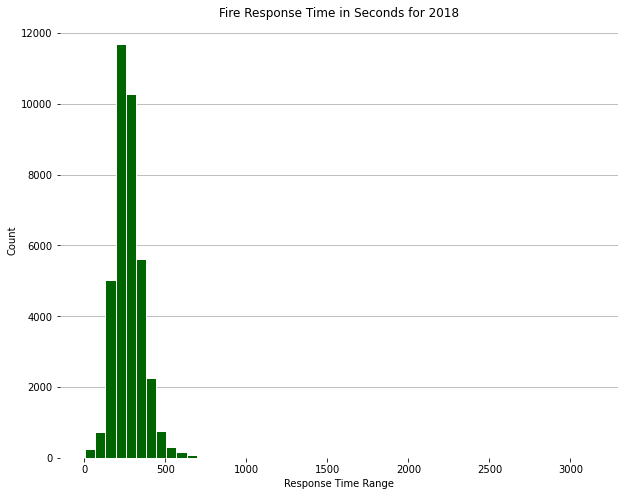

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))    


ax.hist(Fire2018.ResponseTime, 
        bins=50, 
        color="darkgreen", 
        edgecolor='white', lw=1)

ax.set(xlabel='Response Time Range', ylabel='Count', title='Fire Response Time in Seconds for 2018')


ax.grid(axis='y')           # show horizontal grid lines only
ax.set_axisbelow(True)      # show grid behind bins
plt.box(False)              # remove the frame 

When we have our outliers in our data (extreme values), this can result in our data being possibly skewed. To address this, we can recode the outliers by setting a limit to the observations.

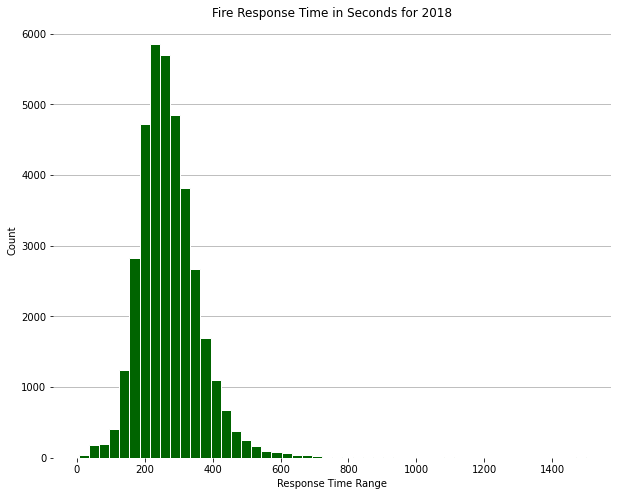

In [11]:
#Recode for outliers in response times. 
Fire2018.ResponseTime  = np.where(Fire2018.ResponseTime  > 1500, 1500, Fire2018.ResponseTime )


# Replot our data
fig, ax = plt.subplots(figsize=(10, 8))    


ax.hist(Fire2018.ResponseTime, 
        bins=50, 
        color="darkgreen", 
        edgecolor='white', lw=1)

ax.set(xlabel='Response Time Range', ylabel='Count', title='Fire Response Time in Seconds for 2018')


ax.grid(axis='y')           # show horizontal grid lines only
ax.set_axisbelow(True)      # show grid behind bins
plt.box(False)              # remove the frame 


### Density Plots <a id=2.2.2></a>

Density plots are a variation of histograms that are useful for visualizing the underlying probability distribution. Unlike a histogram the y-axis of density plots represents the height of the curve (it's density), whereas the y-axis of a histogram denotes a count.

**Violin** and **box plots** are variations of histograms and density plots that can also be used. 

#### Creating the density plot

C:\Users\sarfa\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


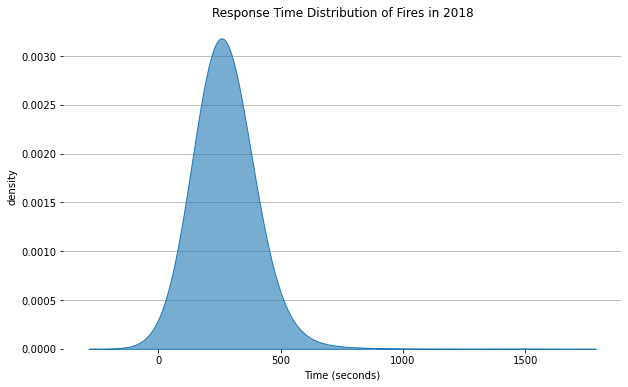

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))                   # another way to work with Seaborn

sns.kdeplot(Fire2018.ResponseTime, ax=ax,                 # create `ax` with matplotlib, then draw plots on `ax` with seaborn
                     bw=1,                                # bandwidth
                     shade=True,                          # fill the area under the density curve
                     alpha=0.6)                           # transparency of the color
                                                          # defult using a Guassian kernel       


    
## drop down to the matplotlib layer

ax.set_xlabel('Time (seconds)')
ax.set_ylabel('density')
ax.set_title('Response Time Distribution of Fires in 2018')

ax.grid(axis='y')           # show horizontal grid lines only
ax.set_axisbelow(True)      # show grid behind bins
plt.box(False)              # remove the frame

Please be aware that *binwidth* in histogram and *bandwidth* in density plot are important parameters that always need to be adjusted to each visualization you create to avoid creating a misleading plot.

## Two or More Variables Visualization <a id=3></a>

### Categorical Variables <a id=3.1></a>

There are many visualization options for multiple categorical variables such as: **side by side graphs, grouped bar graphs, stacked bar graphs, mosaic plots, tree maps,** and **parallel sets**. 


### Grouped Bar Graph<a id=3.1.1></a>

An alternate option for multiple categorical variables is a grouped bar graph.

In [12]:
# Getting the count of each incident by borough
Bincident = Fire2018.groupby(["Borough","IncidentType"])["Borough"].agg('count').to_frame('Count').reset_index()

#Bincident = Bincident.set_index('Borough')
#Bincident = Bincident.rename(index={'RICHMOND / STATEN ISLAND':'STATEN'})

Bincident['Borough'] = Bincident['Borough'].str.replace('RICHMOND / STATEN ISLAND', 'STATEN')


print (Bincident)

     Borough         IncidentType  Count
0      BRONX  NonStructural Fires   1770
1      BRONX     Structural Fires   5875
2   BROOKLYN  NonStructural Fires   3782
3   BROOKLYN     Structural Fires   8062
4  MANHATTAN  NonStructural Fires   2521
5  MANHATTAN     Structural Fires   5723
6     QUEENS  NonStructural Fires   2596
7     QUEENS     Structural Fires   5117
8     STATEN  NonStructural Fires    472
9     STATEN     Structural Fires   1350


#### Creating the grouped bar graph

Text(0.5, 0.98, 'Incident Types by Borough')

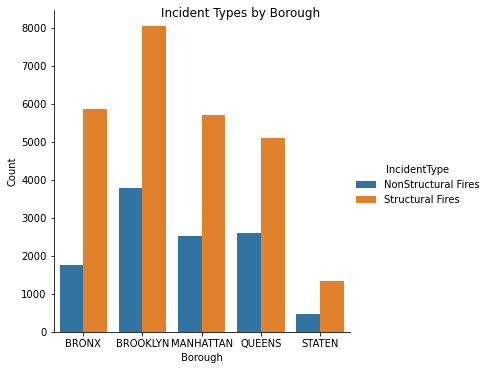

In [17]:
# Let's use seaborn for this

grouped = sns.catplot(data=Bincident, 
                      kind="bar", 
                      x="Borough", 
                      y="Count", 
                      hue="IncidentType")

grouped.set_axis_labels("Borough", "Count")           # add labels
grouped.fig.suptitle('Incident Types by Borough')     # add title


### Numerical Variables <a id=3.2></a>
Numerical variables can be of two types. X-Y relationships and time series relationships.

There are many visualization options for X-Y relationships such as: **scatter plots** and **hexbins**.

For time series there are **line** and **area** graphs. 

### Scatter Plot <a id=3.2.1></a>
Scatter plots are useful to determine if two variables are related or when there is paired numerical data. This means if the data contains two numerical variables that go together (for example, price and square feet in a dataset about house costs) a scatter plot would be a useful visualization.

**Hexbins** are another type of graph that can be a useful way to maneuver overplotting in scatter plots. 

### Time Series<a id=3.2.2></a>

#### Creating the time series

Line graphs are often used to demonstrate time trends and are referred to as a "time series."
A time series is a sequence of data points plotted over time using lines, but can also consist of multiple data points. 

In this example, we will look at fire response time trends throughout the course of the year to see if the time it takes to respond to a fire throughout the five boroughs changes monthly. 

        Date                   Borough  ResponseTime
0 2018-01-01                     BRONX    247.461538
1 2018-01-01                  BROOKLYN    237.937500
2 2018-01-01                 MANHATTAN    258.702703
3 2018-01-01                    QUEENS    258.000000
4 2018-01-01  RICHMOND / STATEN ISLAND    299.888889


[Text(0, 0.5, 'Response Time in Seconds'),
 Text(0.5, 1.0, 'Response Time by Borough in 2018')]

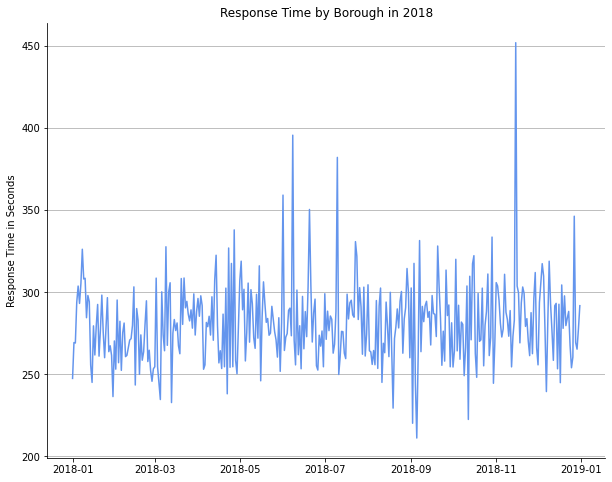

In [13]:
borough = Fire2018.groupby(['Date','Borough'])['ResponseTime'].mean()
borough = borough.reset_index()
print(borough.head())

# individual boroughs
Bronx = borough[(borough.Borough == 'BRONX')] 
Brooklyn = borough[(borough.Borough == 'BROOKLYN')] 
Manhattan = borough[(borough.Borough == 'MANHATTAN')] 
Queens = borough[(borough.Borough == 'QUEENS')] 

# Plot
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(Bronx.Date, Bronx.ResponseTime, color='cornflowerblue',label='Bronx')
#ax.plot(Brooklyn.Date, Brooklyn.ResponseTime, 'orange',label='Brooklyn')
#ax.plot(Manhattan.Date, Manhattan.ResponseTime, 'blue',label='Manhattan')
#ax.plot(Queens.Date, Queens.ResponseTime,  'green', label='Queens')

ax.spines['top'].set_visible(False)                    # remove top border
ax.spines['right'].set_visible(False)                  # remove right border

ax.grid(axis='y')                                      
ax.set_axisbelow(True)                                 

ax.set(ylabel='Response Time in Seconds', title = 'Response Time by Borough in 2018')


### To improve our plot, we can calculate a moving/rolling average.

In statistics, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series of **averages of different subsets** of the full data set.  -- [Wikipedia](https://en.wikipedia.org/wiki/Moving_average)


For example, for a time window of 14 days, we calculate the average values over the 14-day period. The time window then moves by one day, so it now spans the 2nd to 15th day and calculates the average over those 14 days. The time window then moves another 14 days and goes on. The result is a new time series consisting of a sequence of averaged data.

In [14]:
# Adding a 14-Day Moving Average 

Bronx['14_mov_avg'] = Bronx.ResponseTime.rolling(14).mean()            


# Adding a 30-Day Moving Average 
Bronx['30_mov_avg'] = Bronx.ResponseTime.rolling(30).mean()    

print(Bronx.head(30))


          Date Borough  ResponseTime  14_mov_avg  30_mov_avg
0   2018-01-01   BRONX    247.461538         NaN         NaN
5   2018-01-02   BRONX    269.320000         NaN         NaN
10  2018-01-03   BRONX    269.045455         NaN         NaN
15  2018-01-04   BRONX    293.852941         NaN         NaN
20  2018-01-05   BRONX    303.760000         NaN         NaN
25  2018-01-06   BRONX    293.175000         NaN         NaN
30  2018-01-07   BRONX    305.485714         NaN         NaN
35  2018-01-08   BRONX    326.206897         NaN         NaN
40  2018-01-09   BRONX    308.065574         NaN         NaN
44  2018-01-10   BRONX    308.525000         NaN         NaN
49  2018-01-11   BRONX    284.468085         NaN         NaN
54  2018-01-12   BRONX    298.000000         NaN         NaN
59  2018-01-13   BRONX    294.218750         NaN         NaN
64  2018-01-14   BRONX    255.647059  289.802287         NaN
69  2018-01-15   BRONX    245.033333  289.628843         NaN
74  2018-01-16   BRONX  

<ipython-input-14-47e1e754293e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bronx['14_mov_avg'] = Bronx.ResponseTime.rolling(14).mean()
<ipython-input-14-47e1e754293e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bronx['30_mov_avg'] = Bronx.ResponseTime.rolling(30).mean()


[Text(0, 0.5, 'Response Time in Seconds'),
 Text(0.5, 1.0, 'Response Time by Borough in 2018')]

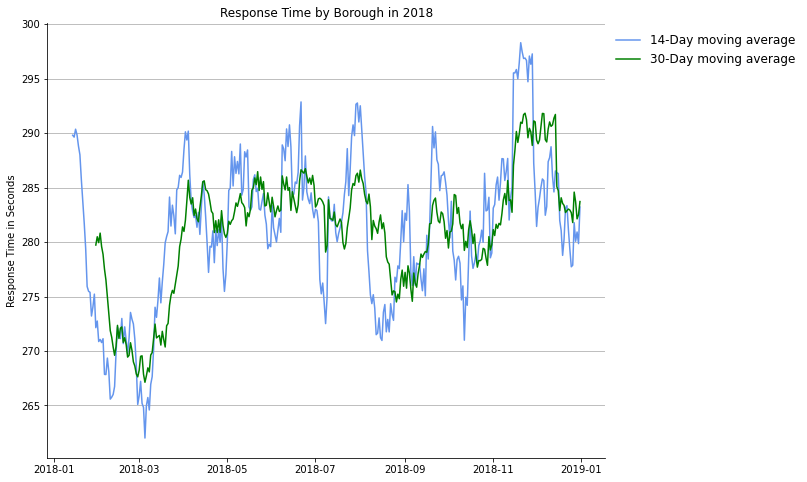

In [15]:
# Plot
fig, ax = plt.subplots(figsize=(10,8))


ax.plot(Bronx['Date'], Bronx['14_mov_avg'], color='cornflowerblue',label='14-Day moving average')

ax.plot(Bronx['Date'], Bronx['30_mov_avg'], color='green',label='30-Day moving average')


ax.spines['top'].set_visible(False)                    # remove top border
ax.spines['right'].set_visible(False)                  # remove right border


ax.grid(axis='y')                      # show horizontal grid lines only
ax.set_axisbelow(True)                 # show grid behind bins

ax.legend(frameon=False, fontsize=12, bbox_to_anchor=(1, 1))              # set legend
ax.set(ylabel='Response Time in Seconds', title = 'Response Time by Borough in 2018')

### Categorical & Numerical Variables <a id=3.3></a>
Now we will look at how to visualize categorical and numerical variables together.

Some ways to do this are: **faceting** or **stacking and overlapping**.

### Faceting <a id=3.3.1></a>
Faceting is when there are multiple graphs side by side. Each of the panels would be organized by the categorical variable, for example: country name or gender.

This can be useful to visualize differences within a variable's categories.

#### Creating a faceted histogram plot

Text(0.5, 1.05, 'Response Time Distribution by Borough')

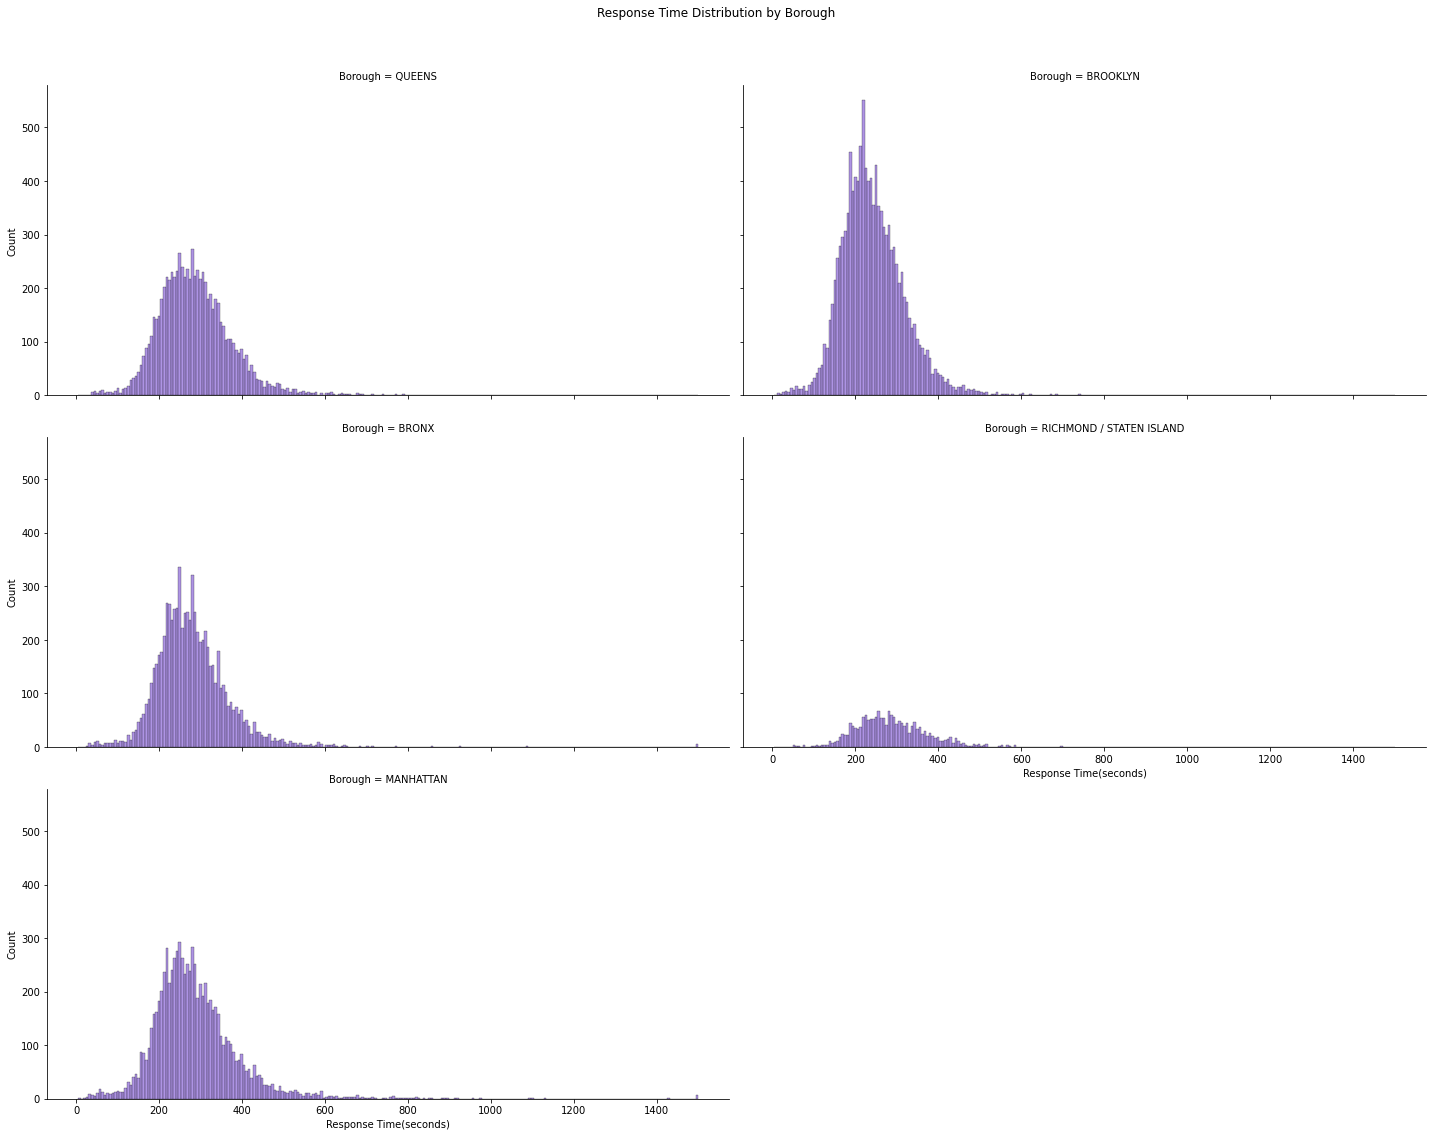

In [16]:
h = sns.displot(Fire2018,
           x = "ResponseTime", col = "Borough",
           col_wrap=2,
           aspect = 2, height = 5,
           color='mediumpurple')

h.set_axis_labels('Response Time(seconds)', 'Count')  
h.fig.suptitle('Response Time Distribution by Borough', y=1.05)

### Stacking & Overlapping <a id=3.3.2></a>

Stacking and overlapping is an alternative to faceting where we are able to collapse all the graphs into one instead of having multiple pannels. This may also be easier to make comparisons among the different graphs.

#### Creating a stacked violin plot

Text(0.5, 1.0, 'Response Time by Borough in 2018')

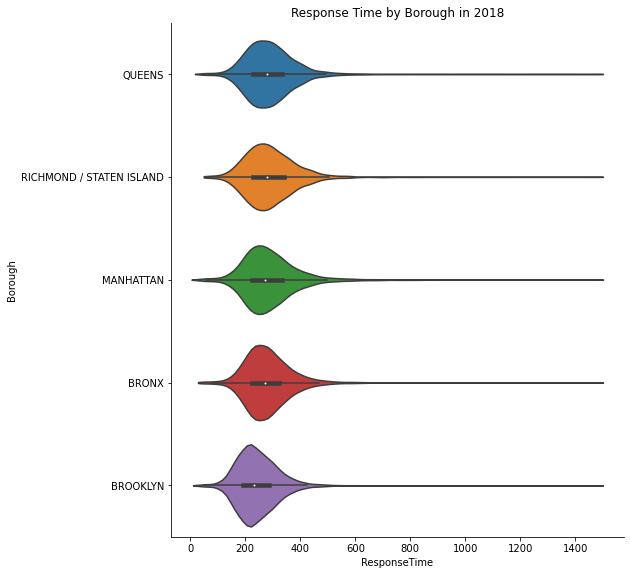

In [22]:
### Violin Plot to show Median Response Time Distribution

# Sort by highest median values
my_order = Fire2018.groupby(by=["Borough"])["ResponseTime"].median().sort_values(ascending=False).index


k = sns.catplot(x= "ResponseTime", y="Borough", 
                kind= 'violin',
                cut= 0, hue_order=True,
                data= Fire2018,
                order= my_order)

k.fig.set_figwidth(12)
k.fig.set_figheight(8)     

plt.title('Response Time by Borough in 2018')



# Using ggplot as an alternative to matplotlib and seaborn

ggplot2 is a popular data visualization tool that R programmers utilize to create beautiful graphs. However, ggplot is available in Python thanks to the  the package "plotnine". The advantages of using ggplot is that some find it much easier to plot and customize their graphs using ggplot rather than combining matplotlib and seaborn.
By assigning our ggplot as an object, it becomes more intuative to add customizations and set parameters for our plot. Let's try to plot a grouped bar chart using the Incident Type count by borough.

In [17]:
### Importing Packages

from plotnine import *

Recall that earlier we created a count for each incident type by borough. 

In [18]:
# Getting the count of each incident by borough
Bincident = Fire2018.groupby(["Borough","IncidentType"])["Borough"].agg('count').to_frame('Count').reset_index()

#Bincident = Bincident.set_index('Borough')
#Bincident = Bincident.rename(index={'RICHMOND / STATEN ISLAND':'STATEN'})

Bincident['Borough'] = Bincident['Borough'].str.replace('RICHMOND / STATEN ISLAND', 'STATEN')


print (Bincident)

     Borough         IncidentType  Count
0      BRONX  NonStructural Fires   1770
1      BRONX     Structural Fires   5875
2   BROOKLYN  NonStructural Fires   3782
3   BROOKLYN     Structural Fires   8062
4  MANHATTAN  NonStructural Fires   2521
5  MANHATTAN     Structural Fires   5723
6     QUEENS  NonStructural Fires   2596
7     QUEENS     Structural Fires   5117
8     STATEN  NonStructural Fires    472
9     STATEN     Structural Fires   1350


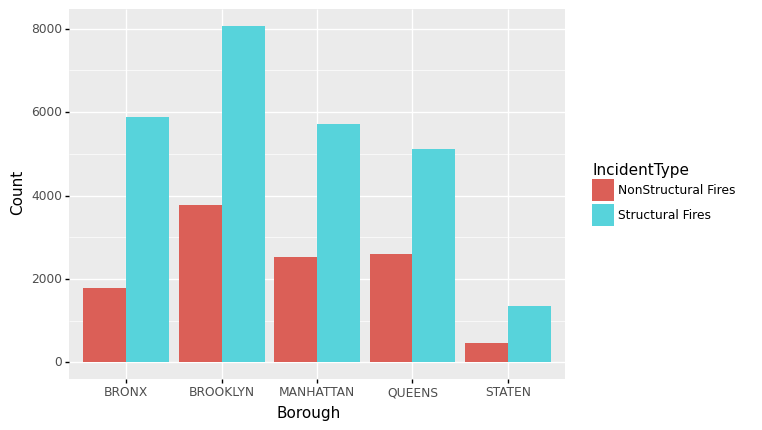

<ggplot: (8788732177439)>


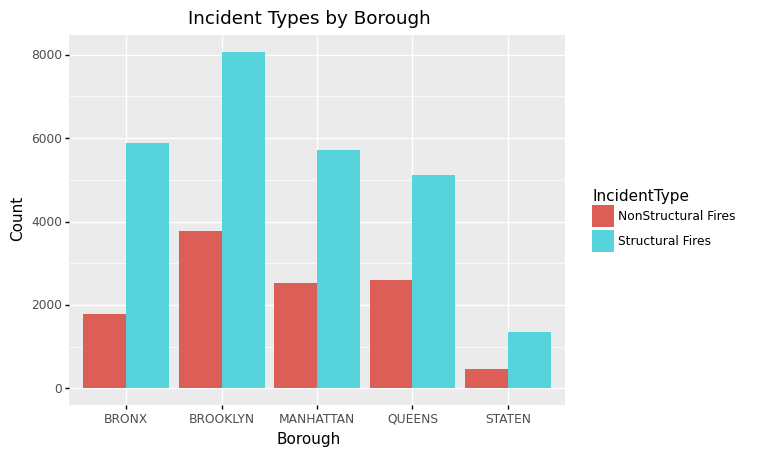

<ggplot: (8788732455075)>


In [21]:
GG1 = ggplot(Bincident, aes(x='Borough', y='Count',fill='IncidentType'))\
+ geom_bar(stat='identity',position='dodge')

print(GG1)

# We can also add a quick title using the ggtitle() function.
print(GG1 + ggtitle("Incident Types by Borough"))


While our plot was easy to plot, in the next section we can make our plot better by changing the parameters of the entire plot, leveraging the theme() function from ggplot. 

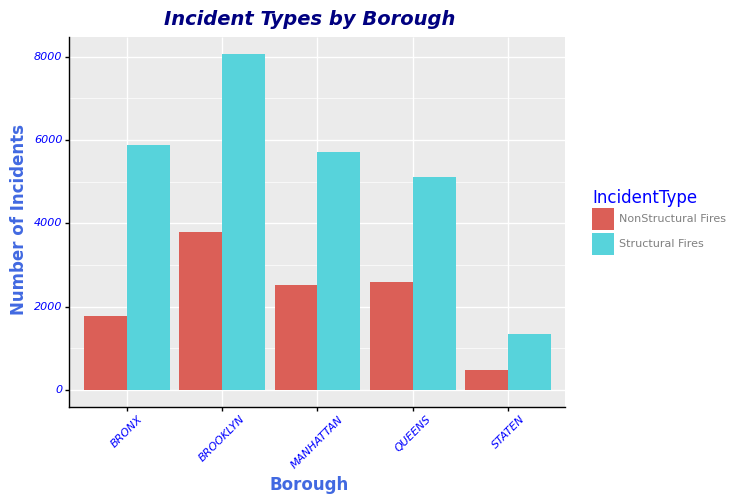

<ggplot: (8788732559180)>

In [22]:
GG1 + labs(title='Incident Types by Borough', x='Borough', y='Number of Incidents')\
+ theme(axis_text_x = element_text(face="italic", color="blue", size=8, angle=45),\
        axis_text_y = element_text(face="italic", color="blue", size=8, angle=0),\
        axis_line = element_line(colour = "black", size = 1, linetype = "solid"),\
        plot_title = element_text(color="Navy", size=14, face="bold.italic"),\
        axis_title_x = element_text(face="bold", color="royalblue", size=12),\
        axis_title_y = element_text(face="bold", color="royalblue", size=12),\
        legend_position = "right",\
        legend_title = element_text(color = "blue", size = 12),\
        legend_text = element_text(color = "grey",size=8))

In [23]:
# We can also save the way we customize our graph as an object that we can call later. 

Custom1 = theme(axis_text_x = element_text(face="italic", color="blue", size=8, angle=45),\
        axis_text_y = element_text(face="italic", color="blue", size=8, angle=0),\
        axis_line = element_line(colour = "black", size = 1, linetype = "solid"),\
        plot_title = element_text(color="Navy", size=14, face="bold.italic"),\
        axis_title_x = element_text(face="bold", color="royalblue", size=12),\
        axis_title_y = element_text(face="bold", color="royalblue", size=12),\
        legend_position = "right",\
        legend_title = element_text(color = "blue", size = 12),\
        legend_text = element_text(color = "grey",size=8),\
        panel_background = element_rect(fill= "white")) #gives us a clear background

# Create a new ggplot graph based on our original plot
GG2 = GG1 + coord_flip() + labs(title='Incident Types by Borough', x='Borough', y='Number of Incidents')


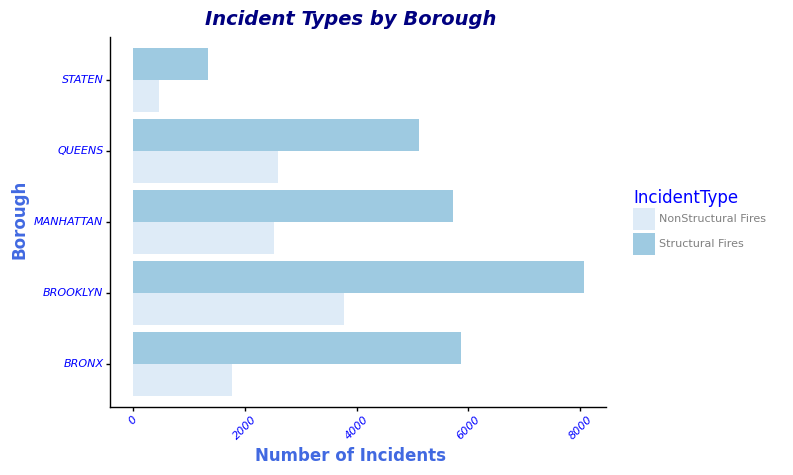

<ggplot: (8788732673503)>

In [24]:
# By saving our plots as objects, we can combine them as we please.

GG2 + Custom1 + scale_fill_brewer(palette="Blues") #change our color scale

As we can see, we were able to take our original plot and flip the axis. We then added the labels for our axis and a title using the labs() function. From there, the theme() function gave us full control in how we wanted to present our plot by changing font and font size for all our labels, as well as the positions of our labels. We also changed the color scale of our plot using the scale_fill_brewer() function. Overall, ggplot allowed us to really take control of how we wanted to present our grouped bar graph.


<div class = "alert alert-info">
<b>Acknowledgement:</b> <br>
    
This Jupyter Notebook was created with use of course materials from <i>DATA 790 Data Visualization with Python</i> with Professor Yinxian Zhang.
<br>
</div> 
